# FHIR example

FHIR (Fast Healthcare Interoperability Resources) is a standard for healthcare data exchange, developed by Health Level Seven International (HL7). It is built on modern web technologies and is designed to enable easier access to healthcare information, supporting JSON, XML, and RDF formats for data representation. FHIR defines a set of "resources" that represent granular clinical concepts, like patients, admissions, and medications, facilitating integration with existing healthcare systems and the development of new applications.

We want to emphasize that FHIR data is primarily designed for data exchanged and not for observational retrospective data. Such data should be stored in OMOP format.

Here, we'll show a quick example on a synthetic dataset to demonstrate how one could work with FHIR data in ehrapy.

In [13]:
import ehrapy as ep
import ehrdata as ed

In [ ]:
%%capture
!wget https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_fhir_latest.zip
!mkdir fhir_dataset
!unzip synthea_sample_data_fhir_latest.zip -d fhir_dataset

FHIR data is often times nested and contains lists and dictionaries.
Generally, there are three options to deal with this:
1. Transform the data into an awkward array and flatten it when needed.
2. Extract values from all lists and dictionaries to store single values in the fields.
3. Remove all lists and dictionaries. Only do this if the information is not relevant to you.

In [14]:
df = ep.io.read_fhir("fhir_dataset", return_df=True)
df = df[:1000]  # The dataset is very large so we subset to the first 1000 records

In [15]:
# Option 3: We're dropping any columns that contain lists or dictionaries and all columns that only contain NA values
df.drop(
    columns=[col for col in df.columns if any(isinstance(x, (list, dict)) for x in df[col].dropna())],
    inplace=True,
)
df.drop(columns=df.columns[df.isna().all()], inplace=True)

In [16]:
edata = ed.io.from_pandas(df, index_column="id")
edata

EHRData object with n_obs × n_vars = 1000 × 73
    shape of .X: (1000, 73)

In [26]:
edata.var["feature_type"].unique()

array(['categorical', 'date', 'numeric'], dtype=object)

In [29]:
np.argwhere(edata.var["feature_type"] == "numeric")

array([[31],
       [36],
       [47],
       [50],
       [51],
       [53],
       [60]])

In [ ]:
import numpy as np
edata[:, np.argwhere(edata.var["feature_type"] == "date").flatten()].X.astype(float)

ArrayView([[   nan,    nan,    nan, ...,    nan,    nan,    nan],
           [   nan,    nan,    nan, ...,    nan,    nan,    nan],
           [   nan,    nan,    nan, ...,    nan,    nan,    nan],
           ...,
           [   nan,    nan,    nan, ...,    nan,    nan, 143.61],
           [   nan,    nan,    nan, ...,    nan,    nan,   4.79],
           [   nan,    nan,    nan, ...,    nan,    nan, 102.38]])

In [34]:
ed.infer_feature_types(edata)

! Feature  was detected as categorical features stored numerically.Please verify and adjust if necessary using `ed.replace_feature_types`.


 Detected feature types for EHRData object with 1000 obs and 73 vars
╠══ 📅 Date features
║   ╠══ resource.abatementDateTime
║   ╠══ resource.authoredOn
║   ╠══ resource.billablePeriod.end
║   ╠══ resource.billablePeriod.start
║   ╠══ resource.birthDate
║   ╠══ resource.context.period.end
║   ╠══ resource.context.period.start
║   ╠══ resource.created
║   ╠══ resource.date
║   ╠══ resource.effectiveDateTime
║   ╠══ resource.expirationDate
║   ╠══ resource.issued
║   ╠══ resource.manufactureDate
║   ╠══ resource.occurrenceDateTime
║   ╠══ resource.onsetDateTime
║   ╠══ resource.performedPeriod.end
║   ╠══ resource.performedPeriod.start
║   ╠══ resource.period.end
║   ╠══ resource.period.start
║   ╠══ resource.recordedDate
║   ╚══ resource.started
╠══ 📐 Numerical features
║   ╠══ resource.distinctIdentifier
║   ╠══ resource.lotNumber
║   ╠══ resource.payment.amount.value
║   ╠══ resource.serialNumber
║   ╠══ resource.suppliedItem.quantity.value
║   ╠══ resource.total.value
║   ╚══ resource.valueQuantity.value
╚══ 🗂️ Categorical features
    ╠══ fullUrl (1000 categories)
    ╠══ patientId (3 categories)
    ╠══ request.method (1 categories)
    ╠══ request.url (19 categories)
    ╠══ resource.claim.reference (69 categories)
    ╠══ resource.class.code (3 categories)
    ╠══ resource.class.system (1 categories)
    ╠══ resource.code.text (199 categories)
    ╠══ resource.context.reference (5 categories)
    ╠══ resource.criticality (1 categories)
    ╠══ resource.custodian.reference (4 categories)
    ╠══ resource.encounter.reference (41 categories)
    ╠══ resource.facility.reference (4 categories)
    ╠══ resource.gender (1 categories)
    ╠══ resource.intent (1 categories)
    ╠══ resource.location.reference (4 categories)
    ╠══ resource.maritalStatus.text (1 categories)
    ╠══ resource.medicationCodeableConcept.text (17 categories)
    ╠══ resource.medicationReference.reference (13 categories)
    ╠══ resource.multipleBirthBoolean (1 categories)
    ╠══ resource.numberOfInstances (1 categories)
    ╠══ resource.numberOfSeries (1 categories)
    ╠══ resource.outcome (1 categories)
    ╠══ resource.patient.reference (1 categories)
    ╠══ resource.payment.amount.currency (1 categories)
    ╠══ resource.prescription.reference (29 categories)
    ╠══ resource.primarySource (1 categories)
    ╠══ resource.provider.reference (8 categories)
    ╠══ resource.referral.reference (1 categories)
    ╠══ resource.requester.reference (4 categories)
    ╠══ resource.resourceType (19 categories)
    ╠══ resource.serviceProvider.reference (4 categories)
    ╠══ resource.status (7 categories)
    ╠══ resource.subject.reference (1 categories)
    ╠══ resource.suppliedItem.itemCodeableConcept.text (8 categories)
    ╠══ resource.text.status (1 categories)
    ╠══ resource.total.currency (1 categories)
    ╠══ resource.type.text (6 categories)
    ╠══ resource.use (1 categories)
    ╠══ resource.vaccineCode.text (3 categories)
    ╠══ resource.valueCodeableConcept.text (1 categories)
    ╠══ resource.valueQuantity.code (25 categories)
    ╠══ resource.valueQuantity.system (1 categories)
    ╠══ resource.valueQuantity.unit (25 categories)
    ╚══ resource.valueString (2 categories)

In [35]:
edata_no_date = edata[:, np.argwhere(edata.var["feature_type"] != "date").flatten()]
edata_no_date = ep.pp.encode(edata_no_date, autodetect=True)

Output()

In [36]:
ep.pp.knn_impute(edata_no_date)

Output()

! Feature 'resource.distinctIdentifier' had more than 99.10% missing values!


! Feature 'resource.serialNumber' had more than 99.10% missing values!
! Feature 'resource.payment.amount.value' had more than 93.10% missing values!
! Feature 'resource.numberOfSeries' had more than 99.30% missing values!
! Feature 'resource.total.value' had more than 93.10% missing values!
! Feature 'resource.suppliedItem.quantity.value' had more than 97.30% missing values!


! Feature 'resource.numberOfInstances' had more than 99.30% missing values!
! Feature 'resource.lotNumber' had more than 99.10% missing values!


! Fallback data (as defined by passed strategy) were used. This warning will only be displayed once.


In [37]:
ep.pp.pca(edata_no_date)
ep.pp.neighbors(edata_no_date, n_pcs=10)
ep.tl.umap(edata_no_date)
ep.tl.leiden(edata_no_date, resolution=0.3, key_added="leiden_0_3")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


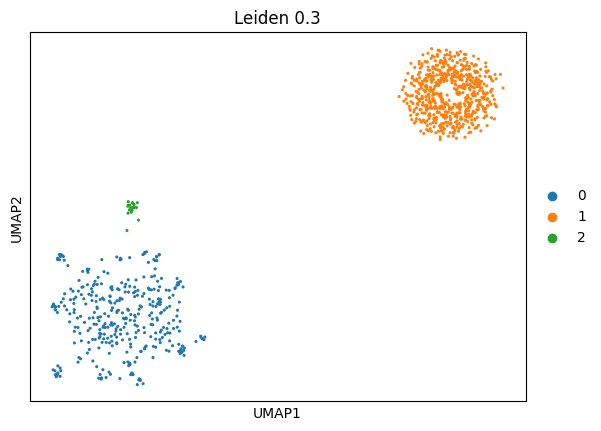

In [38]:
ep.pl.umap(edata_no_date, color=["leiden_0_3"], title="Leiden 0.3", size=20)